In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.signal import savgol_filter
import pandas as pd

In [3]:
data = pd.read_csv('feature_space.csv')
idle_time = data['idle time %'].values
avg_speed = data['avg speed'].values
avg_long_acceleration = data['avg long. acceleration'].values

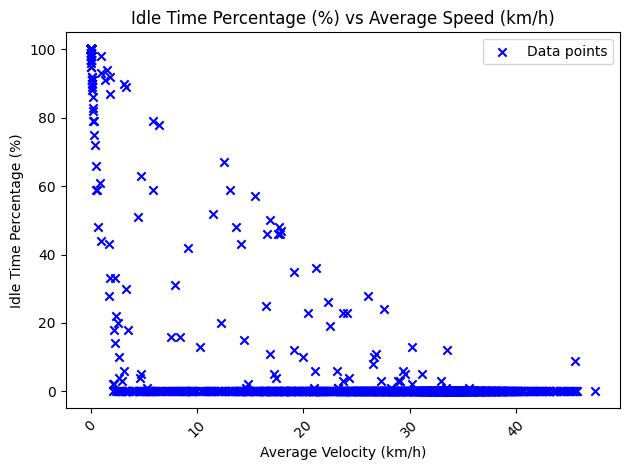

In [4]:
plt.scatter(avg_speed, idle_time, c='blue', marker='x', label='Data points')
plt.xlabel('Average Velocity (km/h)')
plt.ylabel('Idle Time Percentage (%)')
plt.title('Idle Time Percentage (%) vs Average Speed (km/h)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3)
data_for_clustering = np.column_stack((idle_time, avg_speed, avg_long_acceleration))
kmeans_labels = kmeans.fit_predict(data_for_clustering)

c:\Users\kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


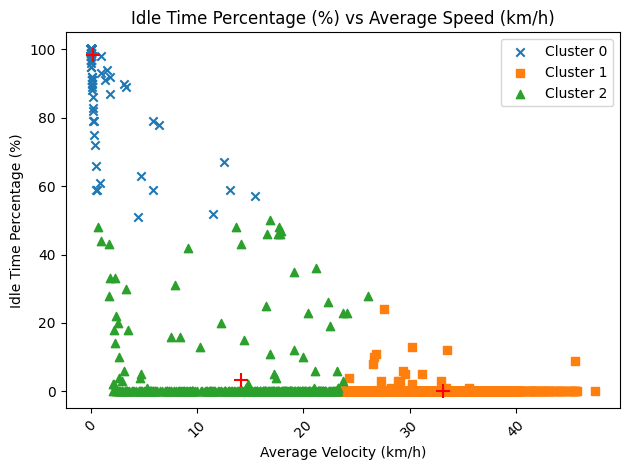

In [6]:
markers = ['x', 's', '^']

for cluster_label in set(kmeans_labels):
    cluster_data = [(avg_speed[i], idle_time[i]) for i, label in enumerate(kmeans_labels) if label == cluster_label]
    cluster_avg_speed, cluster_idle_time = zip(*cluster_data)
    plt.scatter(cluster_avg_speed, cluster_idle_time, label=f'Cluster {cluster_label}', marker=markers[cluster_label])

cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    plt.scatter(center[1], center[0], c='red', s=100, marker='+')

plt.xlabel('Average Velocity (km/h)')
plt.ylabel('Idle Time Percentage (%)')
plt.title('Idle Time Percentage (%) vs Average Speed (km/h)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
cluster_counts = np.bincount(kmeans_labels)

for cluster_idx, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_idx} has {count} points.")

Cluster 0 has 498 points.
Cluster 1 has 1115 points.
Cluster 2 has 378 points.


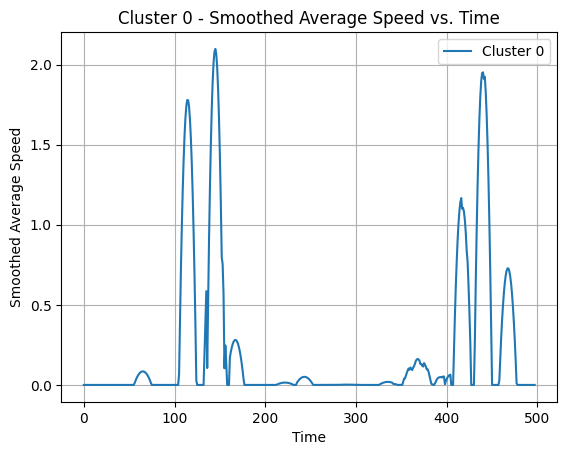

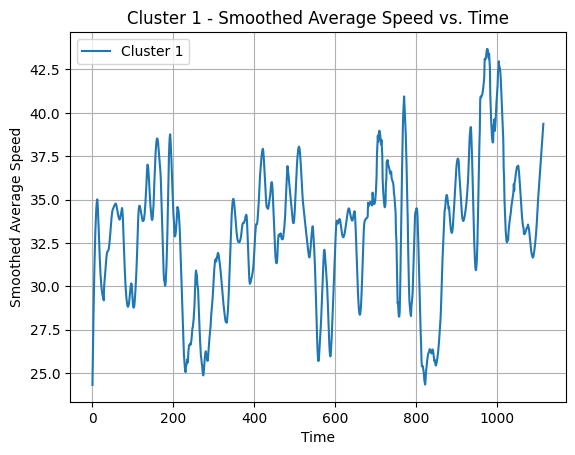

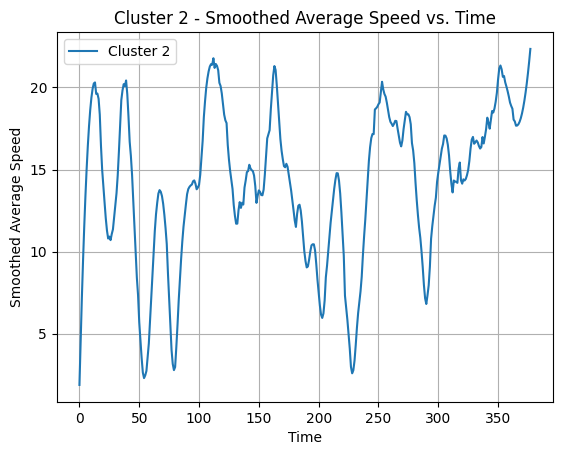

In [14]:
cluster_data_dict = {}
row_count_dict = {}

for cluster_label in set(kmeans_labels):
    cluster_data = data_for_clustering[kmeans_labels == cluster_label]
    cluster_data_dict[cluster_label] = cluster_data
    row_count_dict[cluster_label] = cluster_data.shape[0]

for cluster_label in set(kmeans_labels):
    cluster_data = cluster_data_dict[cluster_label]
    avg_speed_cluster = cluster_data[:, 1]
    num_rows_cluster = row_count_dict[cluster_label]

    smoothed_avg_speed = savgol_filter(avg_speed_cluster, window_length=25, polyorder=2)

    # Apply a minimum threshold to prevent negative values
    min_threshold = 0  # Adjust as needed
    smoothed_avg_speed = np.maximum(smoothed_avg_speed, min_threshold)

    plt.plot(range(num_rows_cluster), smoothed_avg_speed, label=f'Cluster {cluster_label}')


    # plt.plot(range(num_rows_cluster), smoothed_avg_speed, label=f'Cluster {cluster_label}')
    plt.xlabel('Time')
    plt.ylabel('Smoothed Average Speed')
    plt.title(f'Cluster {cluster_label} - Smoothed Average Speed vs. Time')
    plt.grid(True)
    plt.legend()
    plt.show()